In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

In [3]:
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
data.duplicated().sum()

np.int64(1)

In [7]:
data[data.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [8]:
data.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [9]:
data['smoker'] = np.where(data['smoker']=="no", 0, 1)
data['sex'] = np.where(data['sex']=='male', 0, 1)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


# EDA of Age Groups

In [42]:
# If you haven't already created age groups:
bins = [17, 24, 44, 65]
labels = ['Young Adult (18–24)', 'Adult (25–44)', 'Middle-Aged (44–65)']
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, include_lowest=True)

# Summary of charges by age group
age_summary = (
    data.groupby('age_group')['charges']
        .agg(count='count', mean='mean', median='median', std='std', min='min', max='max')
        .round(2)
)
print(age_summary)

                     count      mean    median       std      min       max
age_group                                                                  
Young Adult (18–24)    278   9011.34   2457.36  11795.11  1121.87  44501.40
Adult (25–44)          531  11714.47   6406.41  11676.44  2137.65  58571.07
Middle-Aged (44–65)    529  17070.49  12029.29  11621.35  7147.10  63770.43


/var/folders/tg/g161x0m50lxgx68hfwk_3qk80000gn/T/ipykernel_79958/3290605786.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('age_group')['charges']


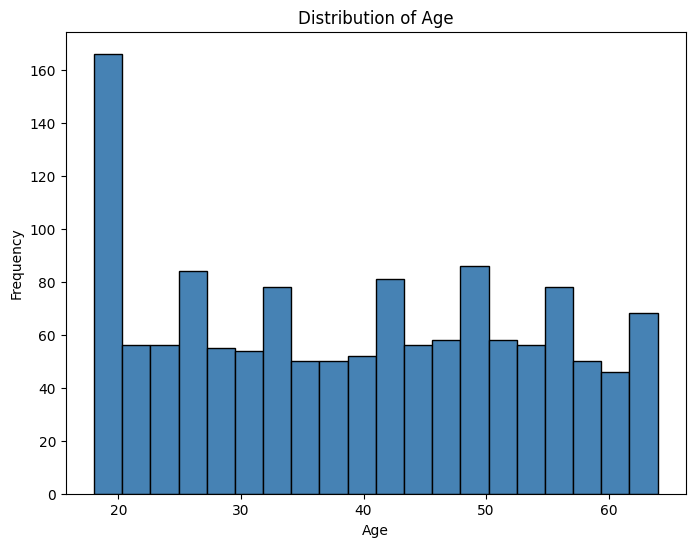

In [64]:
plt.figure(figsize=(8,6))
plt.hist(data['age'], bins=20, color='steelblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

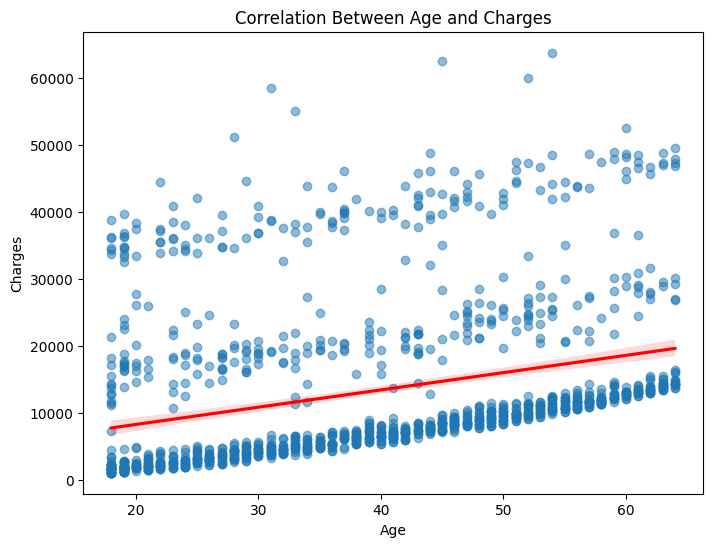

In [63]:
plt.figure(figsize=(8,6))
sns.regplot(x='age', y='charges', data=data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Correlation Between Age and Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()


/var/folders/tg/g161x0m50lxgx68hfwk_3qk80000gn/T/ipykernel_79958/643716585.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='age_group', y='charges', data=data, palette=viridis_colors)
/var/folders/tg/g161x0m50lxgx68hfwk_3qk80000gn/T/ipykernel_79958/643716585.py:3: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.boxplot(x='age_group', y='charges', data=data, palette=viridis_colors)


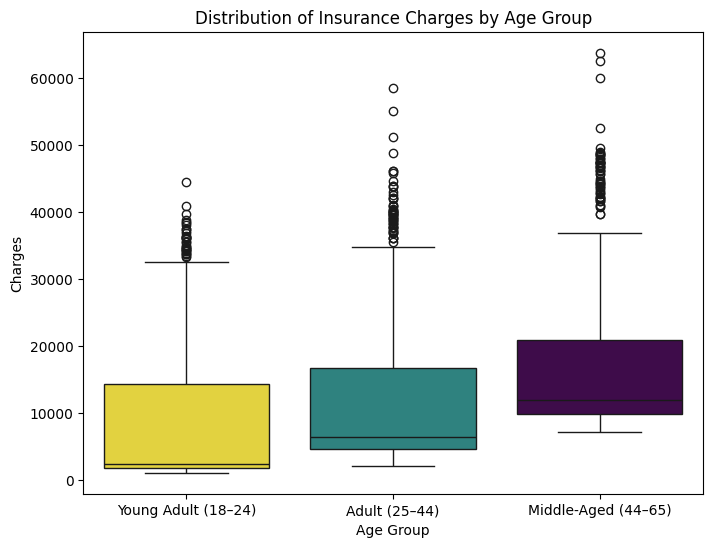

In [68]:
plt.figure(figsize=(8,6))
viridis_colors = cm.viridis_r(np.linspace(0, 1, len(labels)))
sns.boxplot(x='age_group', y='charges', data=data, palette=viridis_colors)
plt.title('Distribution of Insurance Charges by Age Group', fontsize=12)
plt.xlabel('Age Group')
plt.ylabel('Charges')
plt.show()


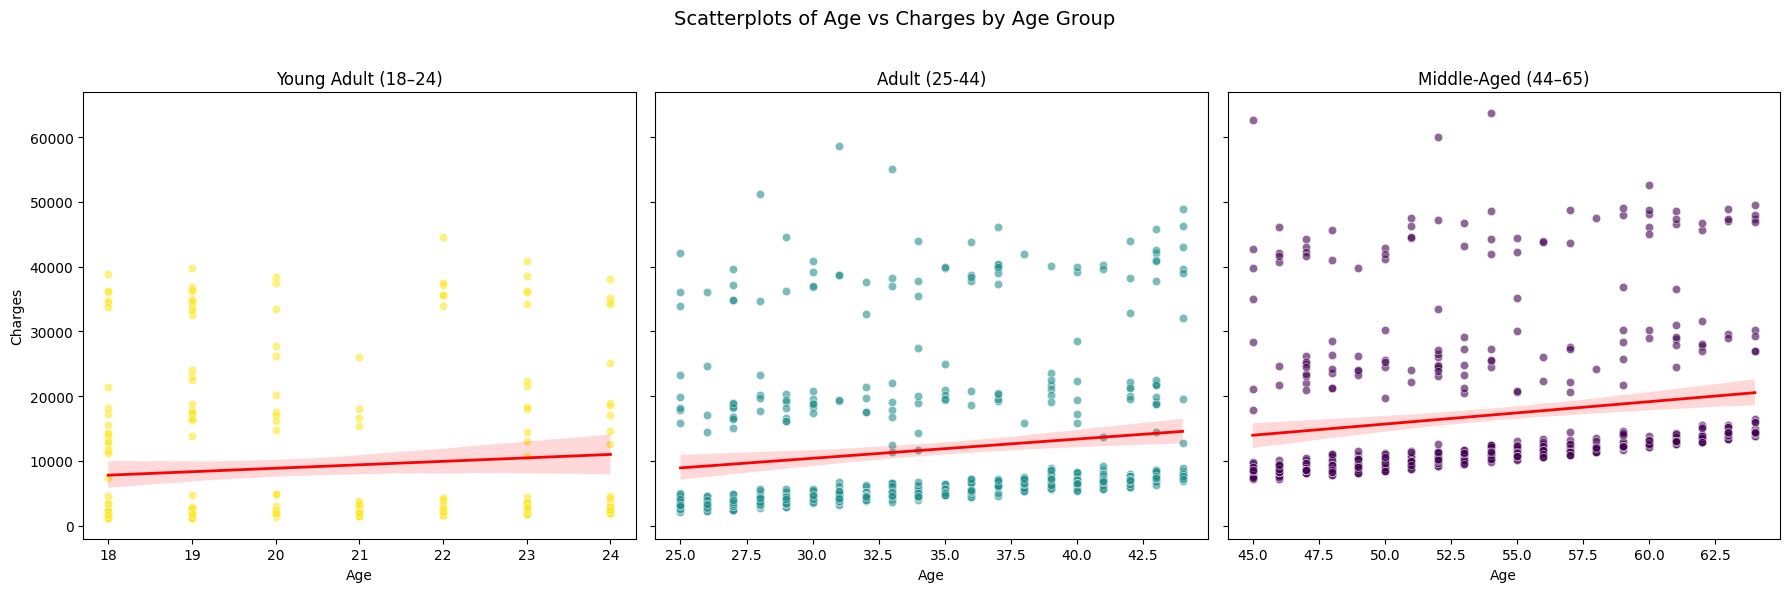

In [28]:
# Create 3x1 grid
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Get the unique age groups in order
groups = data['age_group'].cat.categories

# Loop through each group and plot on its own axis
for i, group in enumerate(groups):
    subset = data[data['age_group'] == group]
    sns.scatterplot(ax=axes[i], data=subset, x='age', y='charges', 
                    color=cm.viridis_r(np.linspace(0, 1, len(groups)))[i], alpha=0.6)
    
    # Optional regression line
    sns.regplot(ax=axes[i], data=subset, x='age', y='charges', 
                scatter=False, color='red', line_kws={'lw':2})
    
    # Add title for each subplot
    axes[i].set_title(f"{group}", fontsize=12)
    axes[i].set_xlabel("Age")
    axes[i].set_ylabel("Charges")

# Adjust layout
plt.suptitle("Scatterplots of Age vs Charges by Age Group", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# EDA of Smoker vs Non-smoker

In [41]:
smoker_summary = (data
           .groupby('smoker')['charges']
           .agg(['count','mean','median','std','min','max'])
           .round(2))
print(smoker_summary)

        count      mean    median       std       min       max
smoker                                                         
0        1064   8434.27   7345.41   5993.78   1121.87  36910.61
1         274  32050.23  34456.35  11541.55  12829.46  63770.43


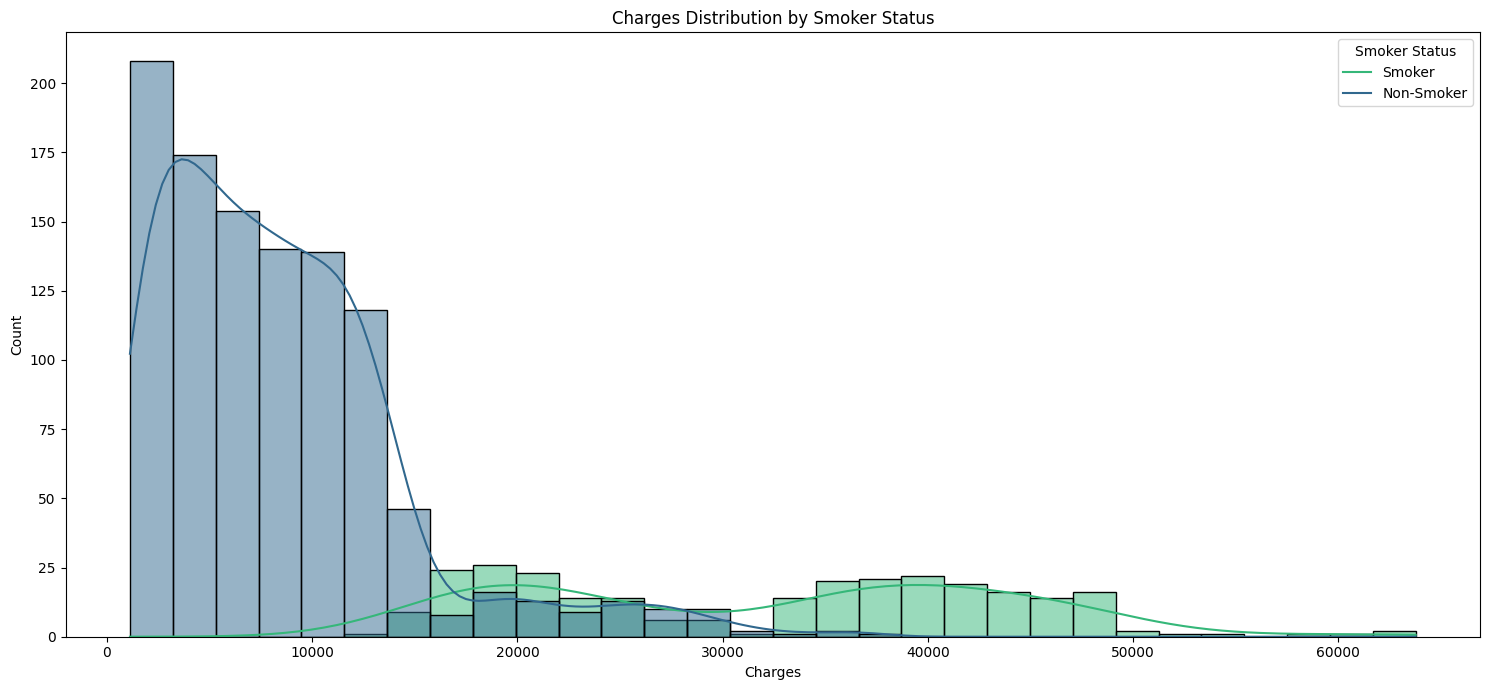

In [40]:
palette = sns.color_palette("viridis", 2)
plt.figure(figsize=(15,7))
sns.histplot(data=data, x='charges', hue='smoker', bins=30, kde=True, stat='count', common_norm=False, palette=palette)
plt.title('Charges Distribution by Smoker Status')
plt.xlabel('Charges')
plt.ylabel('Count')
plt.legend(title='Smoker Status', labels=['Smoker', 'Non-Smoker'])
plt.tight_layout()
plt.show()

/var/folders/tg/g161x0m50lxgx68hfwk_3qk80000gn/T/ipykernel_79958/4245125863.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='smoker', y='charges', palette=palette)


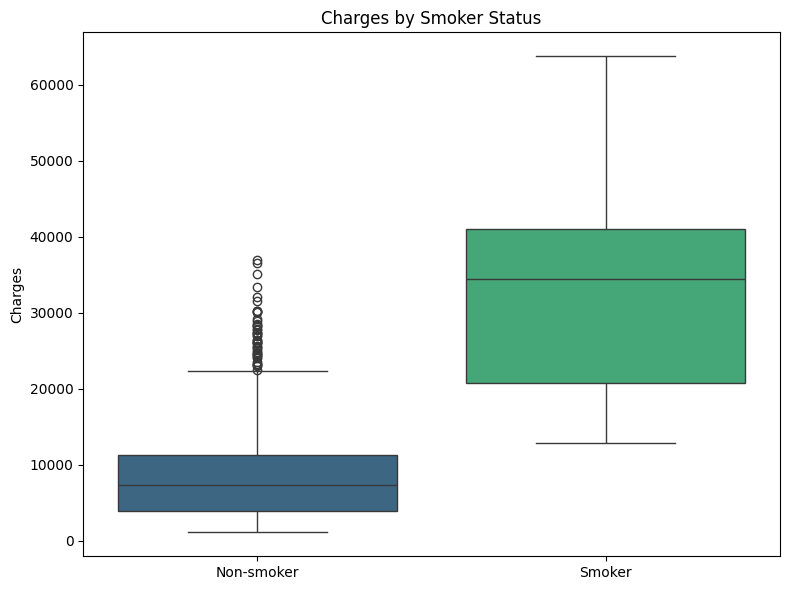

In [67]:
plt.figure(figsize=(8,6))
sns.boxplot(data=data, x='smoker', y='charges', palette=palette)
plt.title('Charges by Smoker Status')
plt.xlabel('')
plt.xticks(ticks=[0, 1], labels=['Non-smoker', 'Smoker'])
plt.ylabel('Charges')
plt.tight_layout()
plt.show()